# ASSIGNMENT 04 EDA and Data Preparation

!pip install xgboost==1.5.0

In [481]:
import pandas as pd
df = pd.read_csv("cars_2021_raw.csv")
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

df

,ID#,BRAND,MODEL,VERSION1,POTENCIA1 (cv),PUERTAS,COMBUSTIBLE,CO2,PRECIO,Tracción,...,N° marchas,Velocidad Máxima (km/h),Aceleración (0-100 km) (s),Revoluciones Potencia Máxima (rpm),Par motor (Nm),Carrocería,Peso (kg),Largo (mm),Ancho (mm),Alto (mm)
0,1,Abarth,Abarth - 595,Abarth 595 1.4T-Jet 107kW,145,3,Gasolina,ambar,"20,934 €",Tracción delantera,...,5.0,205.0,7.9,5500.0,206.0,Berlina,1110.0,3660.0,1627.0,1480.0
1,2,Abarth,Abarth - 595,Abarth 595C 1.4T-Jet 107kW,145,2,Gasolina,ambar,"22,834 €",Tracción delantera,...,5.0,205.0,7.9,5500.0,206.0,Convertible,1150.0,3660.0,1627.0,1480.0
2,3,Abarth,Abarth - 595,Abarth 595 1.4T-Jet Pista 121kW,165,3,Gasolina,ambar,"23,934 €",Tracción delantera,...,5.0,210.0,7.4,5500.0,230.0,Berlina,1110.0,3660.0,1627.0,1485.0
3,4,Abarth,Abarth - 595,Abarth 595C 1.4T-Jet Pista 121kW,165,2,Gasolina,ambar,"25,834 €",Tracción delantera,...,5.0,210.0,7.4,5500.0,230.0,Convertible,1150.0,3660.0,1627.0,1485.0
4,5,Abarth,Abarth - 595,Abarth 595 1.4T-Jet Pista Aut. 121kW,165,3,Gasolina,ambar,"25,884 €",Tracción delantera,...,5.0,210.0,7.4,5500.0,230.0,Berlina,1110.0,3660.0,1627.0,1485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,5375,Volvo,Volvo - XC90,XC90 B5 R-Design AWD Aut.,250,5,Gasolina,rojo,"61,318 €",Todo terreno tracción total permanente,...,8.0,215.0,7.9,5400.0,350.0,Todo Terreno,2004.0,4950.0,2008.0,1776.0
5375,5376,Volvo,Volvo - XC90,XC90 T8 Twin Recharge Inscription Expre...,390,5,Híbrido|Gasolina y corriente eléctrica,verde,"63,099 €",Todo terreno tracción total permanente,...,8.0,230.0,5.8,6000.0,400.0,Todo Terreno,2350.0,4950.0,2008.0,1776.0
5376,5377,Volvo,Volvo - XC90,XC90 T8 Twin Recharge R-Design Expressi...,390,5,Híbrido|Gasolina y corriente eléctrica,verde,"64,584 €",Todo terreno tracción total permanente,...,8.0,230.0,5.8,6000.0,400.0,Todo Terreno,2350.0,4950.0,2008.0,1776.0
5377,5378,Volvo,Volvo - XC90,XC90 T8 Twin Recharge Inscription AWD Aut.,390,5,Híbrido|Gasolina y corriente eléctrica,verde,"68,380 €",Todo terreno tracción total permanente,...,8.0,230.0,5.8,6000.0,400.0,Todo Terreno,2350.0,4950.0,2008.0,1776.0


(Read carefully the additional description and instructions provided)

**MLF_04_A0 - ASSIGNMENT - Warm-up and Data Preparation.pdf**

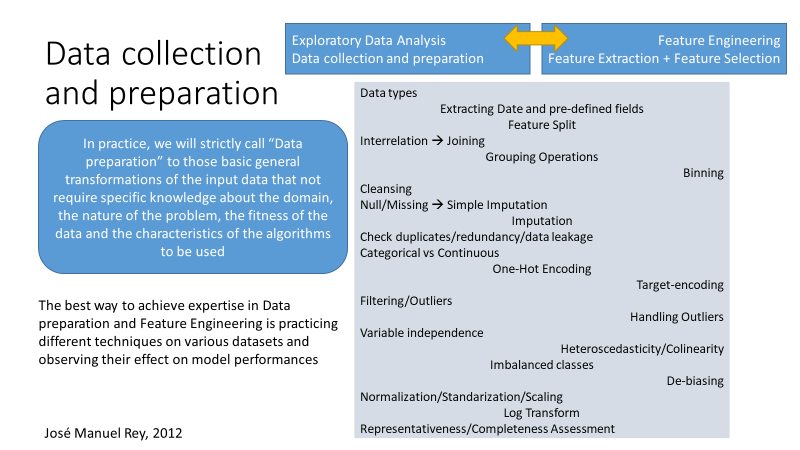

## Understanding Dataset

### Checking shape of our dataset 

In [482]:
df.shape

(5379, 27)

### Checking for missing values 

In [483]:
column_info = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": df.dtypes,
    "Missing Values": df.isnull().sum()
})


def categorize_column(data_type):
    if data_type == 'object':
        return 'Categorical'
    elif data_type in ['int64', 'float64']:
        return 'Quantitative'
    elif data_type == 'bool':
        return 'Boolean'
    else:
        return 'Other'

column_info["Type Category"] = column_info["Data Type"].apply(categorize_column)

column_info.reset_index(drop=True, inplace=True)
column_info

,Column Name,Data Type,Missing Values,Type Category
0,ID#,int64,0,Quantitative
1,BRAND,object,0,Categorical
2,MODEL,object,0,Categorical
3,VERSION1,object,0,Categorical
4,POTENCIA1 (cv),int64,0,Quantitative
5,PUERTAS,int64,0,Quantitative
6,COMBUSTIBLE,object,0,Categorical
7,CO2,object,0,Categorical
8,PRECIO,object,0,Categorical
9,Tracción,object,39,Categorical


Most of our features have few no missing data and for the one that does it corresponds to only a very small part of the dataset. Therefore droping the rows that have missing value is not going to affect our dataset as we are losing less than 1% of it's original size. 

In [484]:
df.describe()

,ID#,POTENCIA1 (cv),PUERTAS,Emisiones CO2 (gr/km),Autonomía (km),Consumo (l/100km),Garantía (meses),Motor (cc),Capacidad depósito (lts),N° marchas,Velocidad Máxima (km/h),Aceleración (0-100 km) (s),Revoluciones Potencia Máxima (rpm),Par motor (Nm),Peso (kg),Largo (mm),Ancho (mm),Alto (mm)
count,5379.00000,5379.000000,5379.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000
mean,2690.00000,176.130879,4.461982,136.574345,1041.802566,5.553352,30.296629,1846.663858,56.384232,6.479026,181.681273,7.623689,4093.281835,317.369831,1597.384831,4670.585581,1875.280712,1664.893071
std,1552.92788,93.376645,0.898635,47.198222,499.148279,1.992147,13.839108,704.397123,20.345723,1.590420,65.908607,4.420131,1622.928817,146.874015,361.758004,494.446919,104.542264,272.635884
min,1.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1345.50000,120.000000,4.000000,111.000000,863.600000,4.600000,24.000000,1498.000000,50.000000,6.000000,171.000000,5.300000,3500.000000,230.000000,1360.000000,4374.000000,1805.000000,1467.000000
50%,2690.00000,150.000000,5.000000,130.000000,1043.500000,5.400000,24.000000,1968.000000,58.000000,6.000000,194.000000,8.700000,4000.000000,300.000000,1579.000000,4660.000000,1852.000000,1605.000000
75%,4034.50000,190.000000,5.000000,160.000000,1224.500000,6.400000,36.000000,1998.000000,70.000000,8.000000,215.000000,10.700000,5500.000000,380.000000,1816.000000,4923.000000,1931.000000,1804.000000
max,5379.00000,761.000000,5.000000,345.000000,5909.100000,15.000000,84.000000,6592.000000,104.000000,10.000000,340.000000,22.400000,8100.000000,1100.000000,3117.000000,7004.000000,2244.000000,3094.000000


## Cleaning

In [510]:
#check for duplicates
df.duplicated().sum()

0

In [485]:
# Drop rows with missing values as it only represents 39 rows out of 5000+ rows
df.dropna(inplace=True)
df.shape

(5340, 27)

In [486]:
df = df.rename(
    columns={
        "BRAND": "Marca",
        "MODEL": "Modelo",
        "VERSION1": "Versión",
        "POTENCIA1 (cv)": "Potencia (cv)",
        "PUERTAS": "Puertas",
        "COMBUSTIBLE": "Combustible",
        "PRECIO": "Precio (€)",
        "Tracción": "Tracción",
        "Transmisión": "Transmisión",
        "Emisiones CO2 (gr/km)": "Emisiones CO2 (gr/km)",
        "Autonomía (km)": "Autonomía (km)",
        "Consumo (l/100km)": "Consumo (l/100km)",
        "Garantía (meses)": "Garantía (meses)",
        "Motor (cc)": "Motor (cc)",
        "Capacidad depósito (lts)": "Capacidad depósito (lts)",
        "N° marchas": "N° marchas",
        "Velocidad Máxima (km/h)": "Velocidad Máxima (km/h)",
        "Aceleración (0-100 km) (s)": "Aceleración (0-100 km) (s)",
        "Revoluciones Potencia Máxima (rpm)": "Revoluciones Potencia Máxima (rpm)",
        "Par motor (Nm)": "Par motor (Nm)",
        "Carrocería": "Carrocería",
        "Peso (kg)": "Peso (kg)",
        "Largo (mm)": "Largo (mm)",
        "Ancho (mm)": "Ancho (mm)",
        "Alto (mm)": "Alto (mm)"
    }
)

Rename All the columns in spanish and keeping the format consistent (lower case with upper case for first letter and having units displayed in parenthesis)

In [487]:
import numpy as np

columns_with_zeros = [
    "Potencia (cv)",
    "Puertas",
    "Autonomía (km)",
    "Capacidad depósito (lts)",
    "Velocidad Máxima (km/h)",
    "Aceleración (0-100 km) (s)",
    "Revoluciones Potencia Máxima (rpm)",
    "Par motor (Nm)",
    "Peso (kg)",
    "Largo (mm)",
    "Ancho (mm)",
    "Alto (mm)"
]
for column in columns_with_zeros:
    df[column] = df[column].replace(0, np.nan)

# Calculate the average for each brand in each category
brand_averages = df.groupby('Marca')[columns_with_zeros].transform('mean')

# Fill NaNs with the brand average
for column in columns_with_zeros:
    df[column] = df[column].fillna(brand_averages[column])

# Check the count of NaN values in the dataframe
df_nan_count = df.isna().sum()

# Display the count of NaN values in each column
df_nan_count

ID#                                    0
Marca                                  0
Modelo                                 0
Versión                                0
Potencia (cv)                          0
Puertas                                0
Combustible                            0
CO2                                    0
Precio (€)                             0
Tracción                               0
Transmisión                            0
Emisiones CO2 (gr/km)                  0
Autonomía (km)                        15
Consumo (l/100km)                      0
Garantía (meses)                       0
Motor (cc)                             0
Capacidad depósito (lts)              15
N° marchas                             0
Velocidad Máxima (km/h)                0
Aceleración (0-100 km) (s)            56
Revoluciones Potencia Máxima (rpm)    15
Par motor (Nm)                         0
Carrocería                             0
Peso (kg)                              0
Largo (mm)      

We now reduced the number of missing values and we assume that the NaN value sustaining come from the fact that some brand might be entirely missing value.with about 100 of them them having missing values out of 5000+ so  again we can drop this value without affecting the overall dataset.

In [488]:
# Drop rows with missing values as it only represents 81 rows out of 5000+ rows
df.dropna(inplace=True)
df.shape

(5269, 27)

### Parsing

In [489]:
unique_traccion = df['Tracción'].unique()
unique_combustible = df['Combustible'].unique()

unique_traccion, print("\n"),unique_combustible

(array(['Tracción delantera ', 'Tracción trasera ',
        'Tracción total permanente ',
        'Todo terreno tracción total permanente ',
        'Tracción total conectable ',
        'Todo terreno tracción total conectable '], dtype=object),
 None,
 array(['Gasolina', 'Diesel', 'Híbrido|Gasolina y corriente eléctrica ',
        'Eléctrico|Corriente eléctrica ', 'Gasolina|Gasolina/gas ',
        'Gasolina|Hidrogeno ', 'Híbrido|Diesel y corriente eléctrica '],
       dtype=object))

In [490]:
def map_combustible(combustible):
    combustible = combustible.strip().lower()
    if "híbrido" in combustible:
        return "Híbrido"  
    elif "eléctrico" in combustible:
        return "Eléctrico" 
    elif "gasolina/gas" in combustible or "hidrogeno" in combustible:
        return "Combustibles Alternativos"  
    elif "gasolina" in combustible:
        return "Gasolina"  
    elif "diesel" in combustible:
        return "Diésel"  
    else:
        return "Otro"  


df['Combustible'] = df['Combustible'].apply(map_combustible)


In [491]:
df["Combustible"].groupby(df["Combustible"]).count()

Combustible
Combustibles Alternativos      67
Diésel                       2808
Eléctrico                     116
Gasolina                     1969
Híbrido                       309
Name: Combustible, dtype: int64

In [492]:
def map_traccion(traccion):
    traccion = traccion.strip().lower()
    if traccion == 'tracción delantera':
        return 'Tracción delantera'  # Front-Wheel Drive
    elif traccion == 'tracción trasera':
        return 'Tracción trasera'    # Rear-Wheel Drive
    # Assuming any other type of traction is considered All-Wheel Drive
    else:
        return 'Tracción total'      # All-Wheel Drive

# Apply the function to the 'Tracción' column
df['Tracción'] = df['Tracción'].apply(map_traccion)

In [493]:
df["Tracción"].groupby(df["Tracción"]).count()

Tracción
Tracción delantera    3560
Tracción total        1258
Tracción trasera       451
Name: Tracción, dtype: int64

The dataset does not contain explicit date columns or fields that indicate the presence of date-related information.

Upon examination, while some columns like 'VERSION1' contain combined information, they do not present a clear opportunity for meaningful feature splitting that would add value to the analysis. The 'MODEL' column, for example, contains information that is already represented in the 'BRAND' column, making splitting redundant.



In [494]:
# Cleansing the 'PRECIO' column
# Remove currency symbols and convert to numerical format
df['Precio (€)'] = df['Precio (€)'].str.replace('€', '').str.replace(',', '').astype(float)

In [495]:
df['Precio (€)'].head()

0    20934.0
1    22834.0
2    23934.0
3    25834.0
4    25884.0
Name: Precio (€), dtype: float64

In [496]:
df['N° marchas'] = df['N° marchas'].astype(int)

### Detect Outliers

In [497]:
df.columns

Index(['ID#', 'Marca', 'Modelo', 'Versión', 'Potencia (cv)', 'Puertas',
       'Combustible', 'CO2', 'Precio (€)', 'Tracción', 'Transmisión',
       'Emisiones CO2 (gr/km)', 'Autonomía (km)', 'Consumo (l/100km)',
       'Garantía (meses)', 'Motor (cc)', 'Capacidad depósito (lts)',
       'N° marchas', 'Velocidad Máxima (km/h)', 'Aceleración (0-100 km) (s)',
       'Revoluciones Potencia Máxima (rpm)', 'Par motor (Nm)', 'Carrocería',
       'Peso (kg)', 'Largo (mm)', 'Ancho (mm)', 'Alto (mm)'],
      dtype='object')

Now we need to decide which method to use in order to eliminate outliers. Two comes to our mind standardizing the data and cheking if the the Z score is superior or inferior to 3 and using the interquartile range method. The first thing to check if we use the Z score is that the data comes from approximately a normal distribution so lets run some shapiro test with a 0.05 significance anf if the hypothesis are rejected we will use the the interquartile method, if not we willl use the Z score.

In [498]:
from scipy.stats import shapiro

cols_to_test = ['Potencia (cv)', 'Precio (€)', 'Emisiones CO2 (gr/km)', 'Autonomía (km)', 'Consumo (l/100km)', 'Motor (cc)', 'Capacidad depósito (lts)', 'N° marchas',
 'Velocidad Máxima (km/h)', 'Aceleración (0-100 km) (s)',
 'Revoluciones Potencia Máxima (rpm)', 'Par motor (Nm)', 'Peso (kg)', 'Largo (mm)', 'Ancho (mm)', 'Alto (mm)']
results = {}
for col in cols_to_test:
    stat, p = shapiro(df[col])
    results[col] = {'Statistic': stat, 'p-value': p}

# Displaying the results
for col, result in results.items():
    print(col + ':\nStatistic: ' + str(result['Statistic']) + ', p-value: ' + str(result['p-value']) + '\n')

Potencia (cv):
Statistic: 0.7600470781326294, p-value: 0.0

Precio (€):
Statistic: 0.6856585741043091, p-value: 0.0

Emisiones CO2 (gr/km):
Statistic: 0.9437896013259888, p-value: 7.628108320398574e-41

Autonomía (km):
Statistic: 0.6689961552619934, p-value: 0.0

Consumo (l/100km):
Statistic: 0.9178552031517029, p-value: 0.0

Motor (cc):
Statistic: 0.8714860677719116, p-value: 0.0

Capacidad depósito (lts):
Statistic: 0.9742122888565063, p-value: 7.934891556186174e-30

N° marchas:
Statistic: 0.8149814009666443, p-value: 0.0

Velocidad Máxima (km/h):
Statistic: 0.973036527633667, p-value: 2.079390073610249e-30

Aceleración (0-100 km) (s):
Statistic: 0.9835431575775146, p-value: 2.682852435353791e-24

Revoluciones Potencia Máxima (rpm):
Statistic: 0.9453749656677246, p-value: 2.0842072579288734e-40

Par motor (Nm):
Statistic: 0.905619204044342, p-value: 0.0

Peso (kg):
Statistic: 0.9881638884544373, p-value: 1.2715806501490142e-20

Largo (mm):
Statistic: 0.940407395362854, p-value: 9.622

/opt/homebrew/Caskroom/miniconda/base/envs/iqcredit/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


All the hypothesis are rejected therefore we can conclude that the data doesn't come from normal definitions so the Z score is not an appropriate method. Lets use the interquartile range. 

In [499]:
# List of numerical columns 
numerical_cols = ['Potencia (cv)', 'Precio (€)', 'Emisiones CO2 (gr/km)', 'Autonomía (km)', 'Consumo (l/100km)', 'Motor (cc)', 'Capacidad depósito (lts)', 'N° marchas',
 'Velocidad Máxima (km/h)', 'Aceleración (0-100 km) (s)',
 'Revoluciones Potencia Máxima (rpm)', 'Par motor (Nm)', 'Peso (kg)', 'Largo (mm)', 'Ancho (mm)', 'Alto (mm)']

col_potential_outliers = ['Potencia (cv)', 'Precio (€)', 'Emisiones CO2 (gr/km)', 'Autonomía (km)', 'Consumo (l/100km)', 'Motor (cc)', 'Capacidad depósito (lts)',
 'Velocidad Máxima (km/h)', 'Aceleración (0-100 km) (s)',
 'Revoluciones Potencia Máxima (rpm)', 'Par motor (Nm)', 'Peso (kg)', 'Largo (mm)', 'Ancho (mm)', 'Alto (mm)']

We first tried to remove the outliers using a factor of 1.5 for the iqr but it removed almost 40% of the data (about 2000 rows leaving us with 3000 observations). Therefore we came to think that it was not the optimum factor to remove the outliers adn that our dataset mighthave a large variance therefore we wanted to make a function that allows to decide the maximum of data that we were ready to let go as a percentage of the remaining dataset. Here I am going to assume that we are ready to lose up to 20% of our data (more or less a thousand rows) in order to find a right balance between having clean data and enough rows to make a viable dataset for Machine learning model.

In [500]:
def remove_outliers_iqr(df, column_names, iqr_factor=1.5):
    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_factor * IQR
        upper_bound = Q3 + iqr_factor * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [501]:
import pandas as pd

def find_optimal_iqr_factor(df, column_names, max_data_loss=0.15, step=0.1, max_factor=3.0):
    """
    Finds the optimal IQR factor that leads to a specified maximum data loss.

    :param df: Pandas DataFrame.
    :param column_names: List of column names to check for outliers.
    :param max_data_loss: Maximum acceptable proportion of data to lose.
    :param step: Step size to increase the IQR factor in each iteration.
    :param max_factor: Maximum IQR factor to consider.
    :return: Optimal IQR factor.
    """
    original_row_count = len(df)
    optimal_factor = 1.5  # Starting with the standard IQR factor
    min_data_loss = 1.0   # Initialize with 100% data loss for comparison

    for factor in np.arange(1.5, max_factor + step, step):
        cleaned_df = remove_outliers_iqr(df, column_names, iqr_factor=factor)
        data_loss = 1 - (len(cleaned_df) / original_row_count)

        if data_loss <= max_data_loss and data_loss < min_data_loss:
            min_data_loss = data_loss
            optimal_factor = factor

        # Break if data loss falls below threshold
        if data_loss < max_data_loss:
            break

    return optimal_factor

# Usage
optimal_factor = find_optimal_iqr_factor(df, numerical_cols, max_data_loss=0.2)
print(f"Optimal IQR factor: {optimal_factor}")


Optimal IQR factor: 2.2000000000000006


In [502]:
# Example usage with a higher IQR factor
no_outliers_df = remove_outliers_iqr(df, numerical_cols, iqr_factor=optimal_factor)


# Displaying the shape of the dataframe before and after outlier removal
original_shape = df.shape
cleaned_shape_iqr = no_outliers_df.shape
print('Original dataframe shape:', original_shape)
print('Cleaned dataframe shape (IQR):', cleaned_shape_iqr)
print('Percentage of data removed:', round((original_shape[0] - cleaned_shape_iqr[0]) / original_shape[0] * 100, 2), '%')

Original dataframe shape: (5269, 27)
Cleaned dataframe shape (IQR): (4281, 27)
Percentage of data removed: 18.75 %


## One hot encoding

Before getting into the one hot encoding process (dummyfication) we need to take a closer look at our dataset in order to figure out how to avoir multicolinearities problem. First thing we could do is when dummifying the features we drop the first column of each dummy. As if we could not do that the n columns could be deducted by the 1,...., n-1 column which cause multicolinearity.

One other thing that we can spot is that the column stating the brand, the model, and the version are totally correlated as if you have a mercedes you can not have a BMW model. This might cause a problem. Moreover if we had to create a column for each model and each version in our one hot encoding process this would lead us to have a tremendous amount of features, which in the future would cause our ML model to be inneficient. Therefore in order to avoid multicolinearity and to improve the efficiency of our future model it seems wise to trop the column model and version. Moreover according to all the other caracteristic that we have about each car the model and version could be more or less deducted from it, therefore the column model and version are not providing any useful information.

In [503]:
cleaned_df= no_outliers_df.drop(columns=['Modelo', 'Versión'])

categorical_cols = cleaned_df.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding while avoiding data leakage and multicollinearity
# Drop the first column of each dummyfied category to avoid multicollinearity
encoded_data = pd.get_dummies(cleaned_df, columns=categorical_cols, drop_first=True)

# Identify boolean columns
bool_cols = [col for col in encoded_data if encoded_data[col].dtype == 'bool']

# Convert only boolean columns to integers
encoded_data[bool_cols] = encoded_data[bool_cols].astype(int)

# Display the head of the encoded dataset
print(encoded_data.shape)

(4281, 79)


# Goal 
We are going to define a goal as a direction of a potential model. We will study a case where we are doing a classification algorithm in order to predict the  color representing the C02 emmission (red, grey, green).

## Data Vizualisation

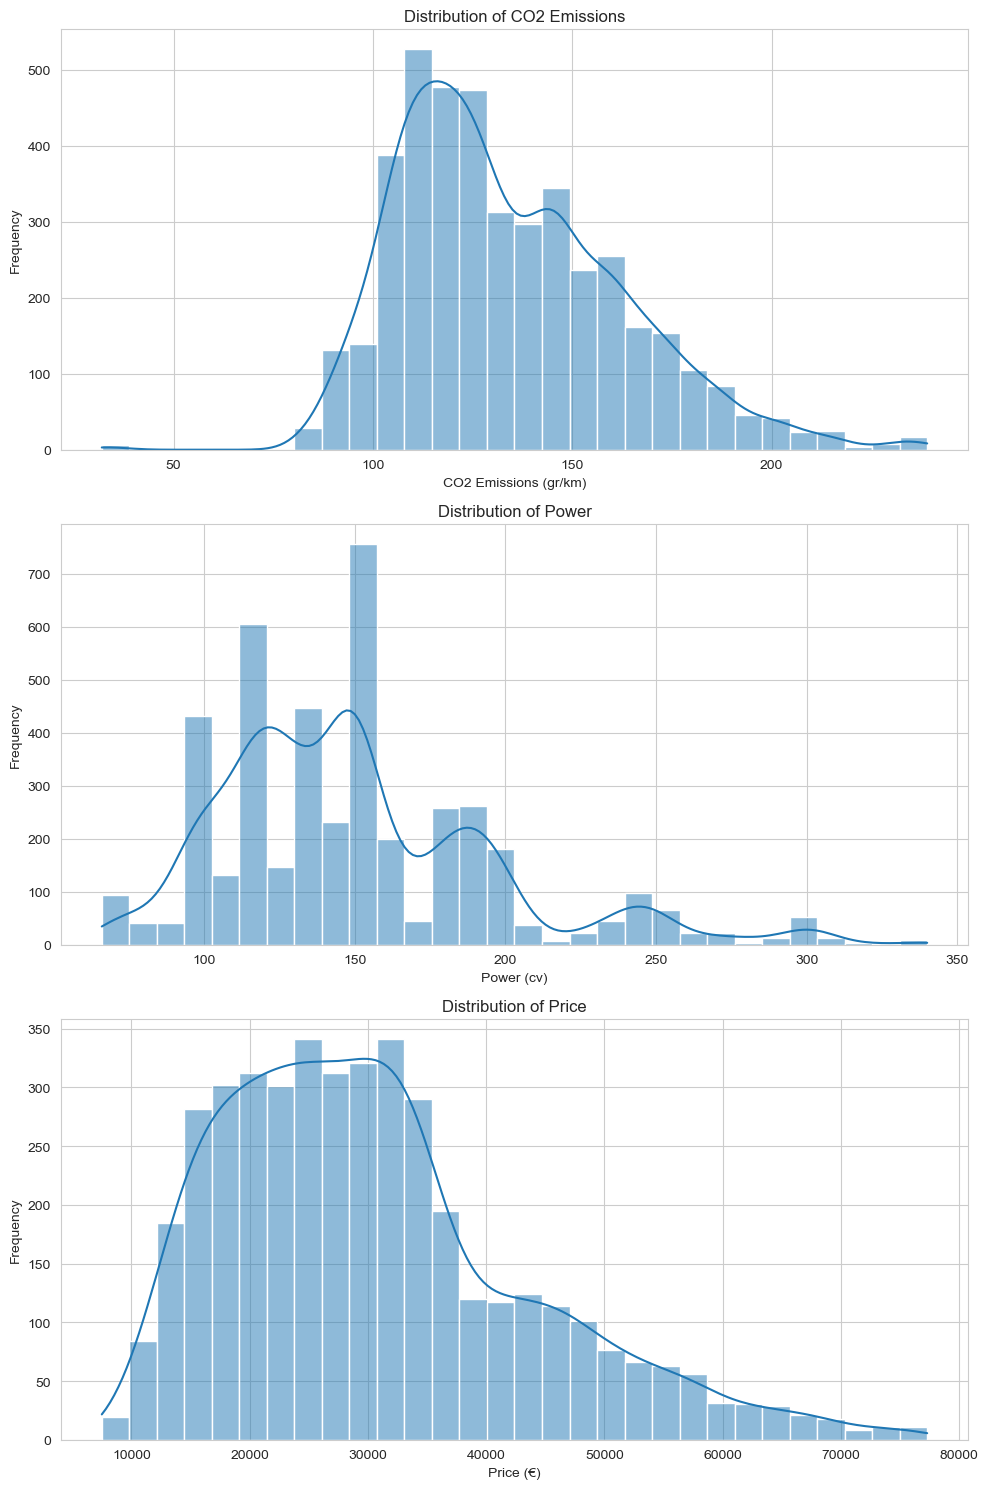

In [504]:
sns.set_style('whitegrid')

# Plot distributions of key features
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Distribution of CO2 emissions
sns.histplot(encoded_data['Emisiones CO2 (gr/km)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of CO2 Emissions')
axes[0].set_xlabel('CO2 Emissions (gr/km)')
axes[0].set_ylabel('Frequency')

# Distribution of Power
sns.histplot(encoded_data['Potencia (cv)'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Power')
axes[1].set_xlabel('Power (cv)')
axes[1].set_ylabel('Frequency')

# Distribution of Price
sns.histplot(encoded_data['Precio (\u20ac)'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Price')
axes[2].set_xlabel('Price (€)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

These visualizations provide insights into the distribution of key features in the dataset and the distribution of cars across different emission categories, which is crucial for understanding the data before proceeding with the classification model.

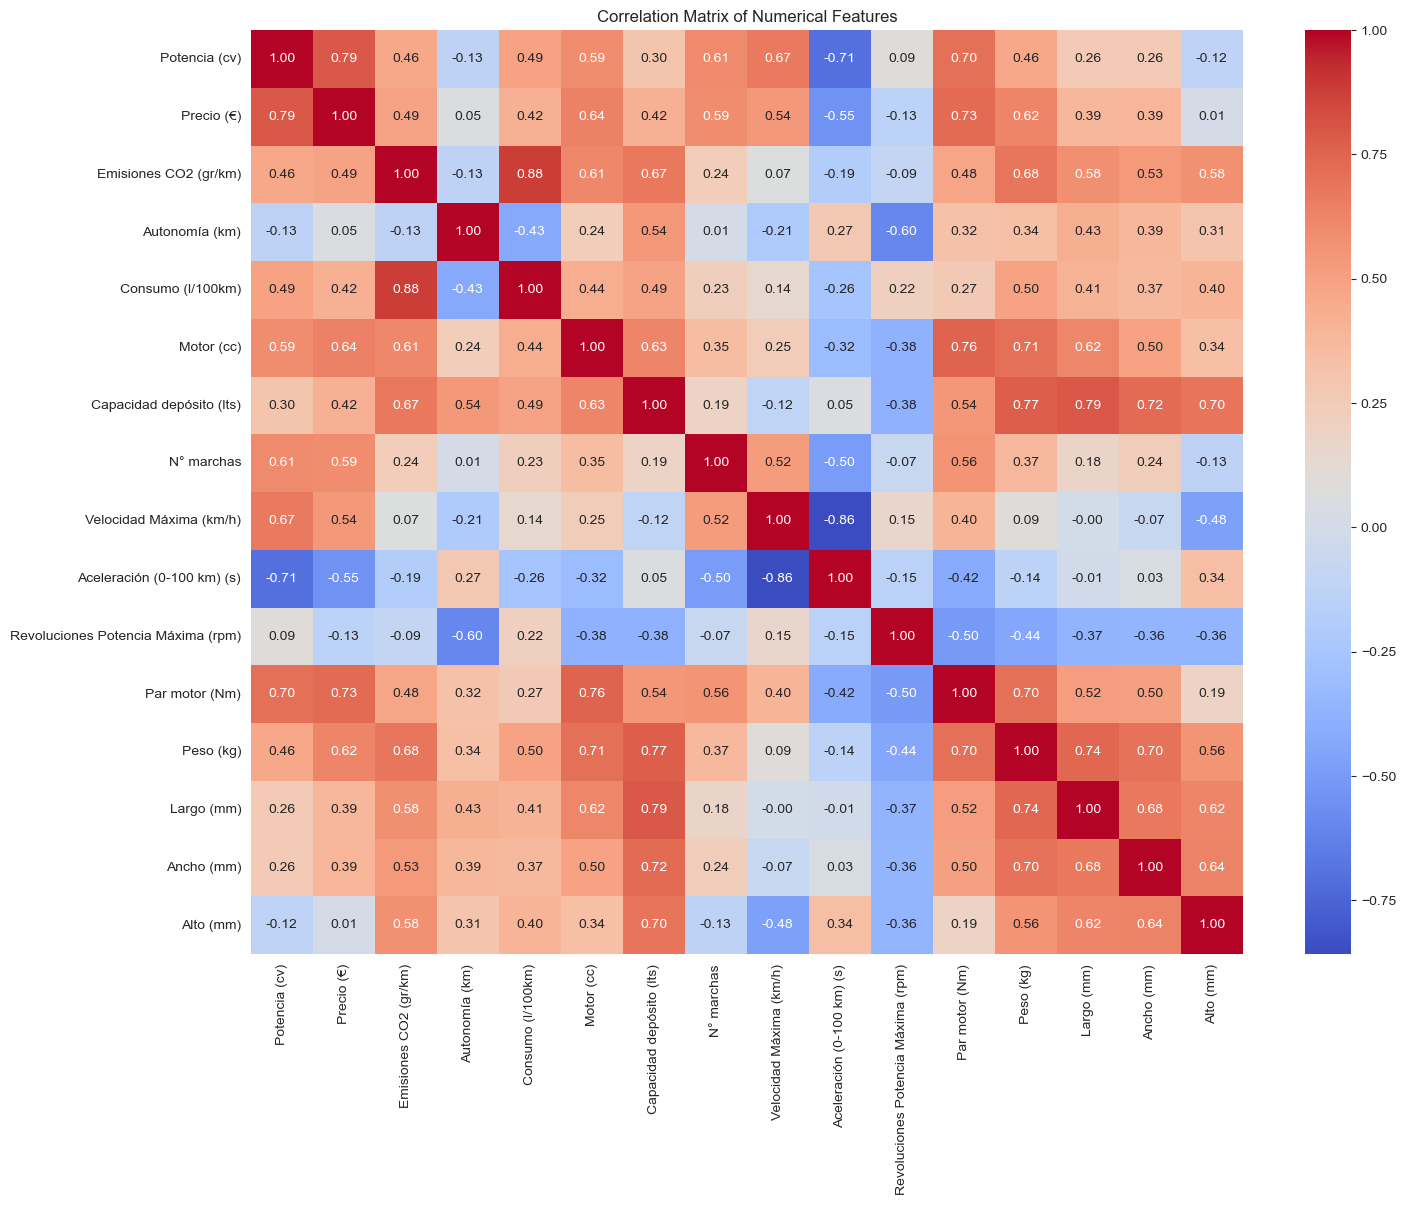

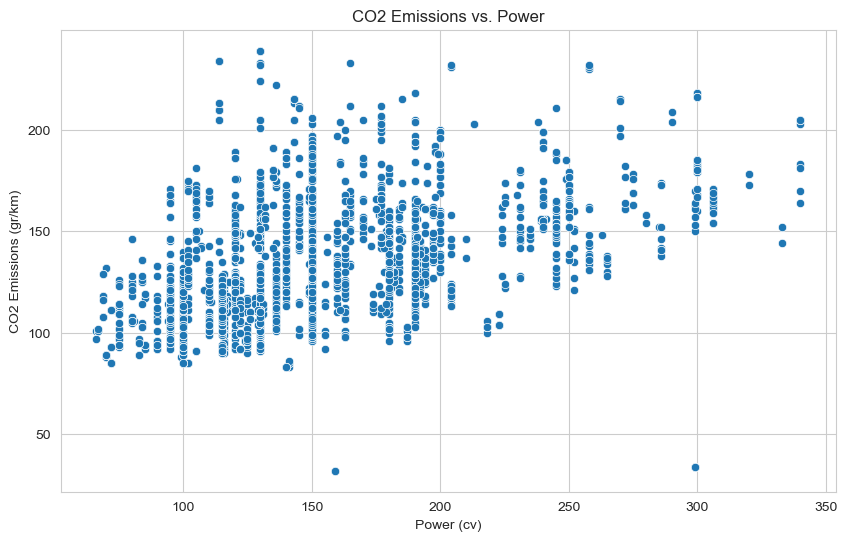

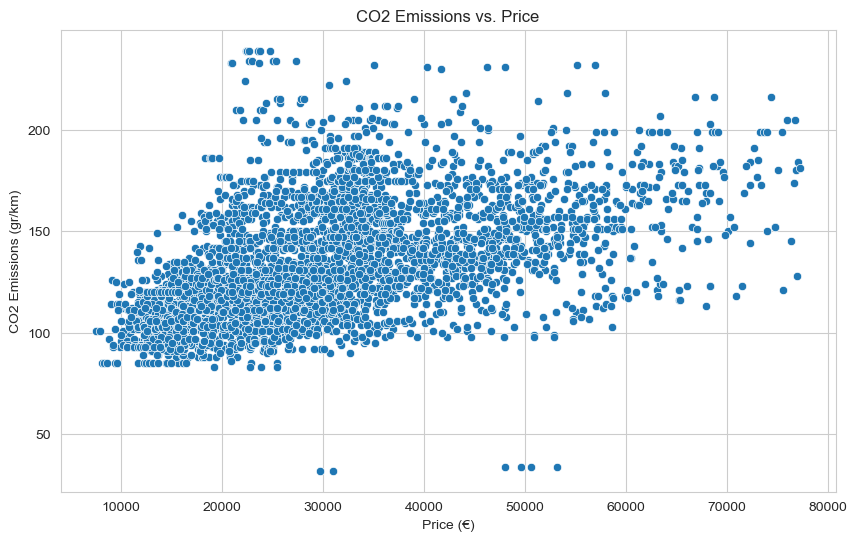

In [505]:
# Correlation matrix for numerical features
correlation_matrix = encoded_data[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Scatter plot for CO2 emissions vs. Power
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Potencia (cv)', y='Emisiones CO2 (gr/km)', data=encoded_data)
plt.title('CO2 Emissions vs. Power')
plt.xlabel('Power (cv)')
plt.ylabel('CO2 Emissions (gr/km)')
plt.show()

# Scatter plot for CO2 emissions vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Precio (\u20ac)', y='Emisiones CO2 (gr/km)', data=encoded_data)
plt.title('CO2 Emissions vs. Price')
plt.xlabel('Price (€)')
plt.ylabel('CO2 Emissions (gr/km)')
plt.show()

Analyzing the correlation matrix and scatter plots, we can observe certain trends and relationships between variables. For instance, there might be a positive correlation between power and CO2 emissions, indicating that cars with higher power tend to emit more CO2. Similarly, the relationship between price and CO2 emissions can provide insights into how the cost of a car might relate to its environmental impact. Regarding the correlation matrix we see that the weight, the motor, the consumptions and others seems vpositively correlated. 

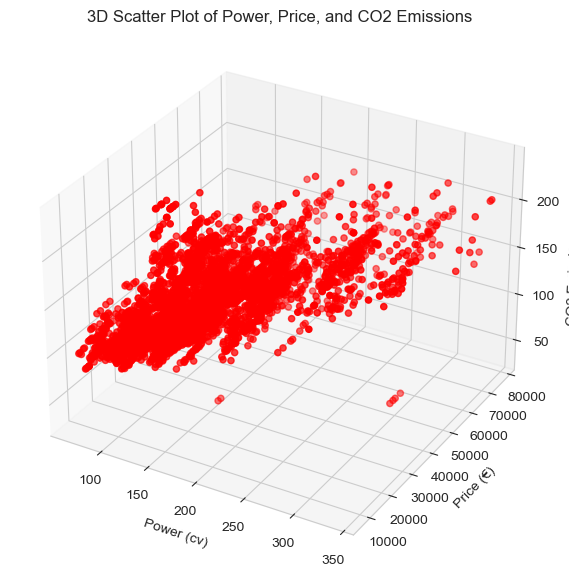

/opt/homebrew/Caskroom/miniconda/base/envs/iqcredit/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


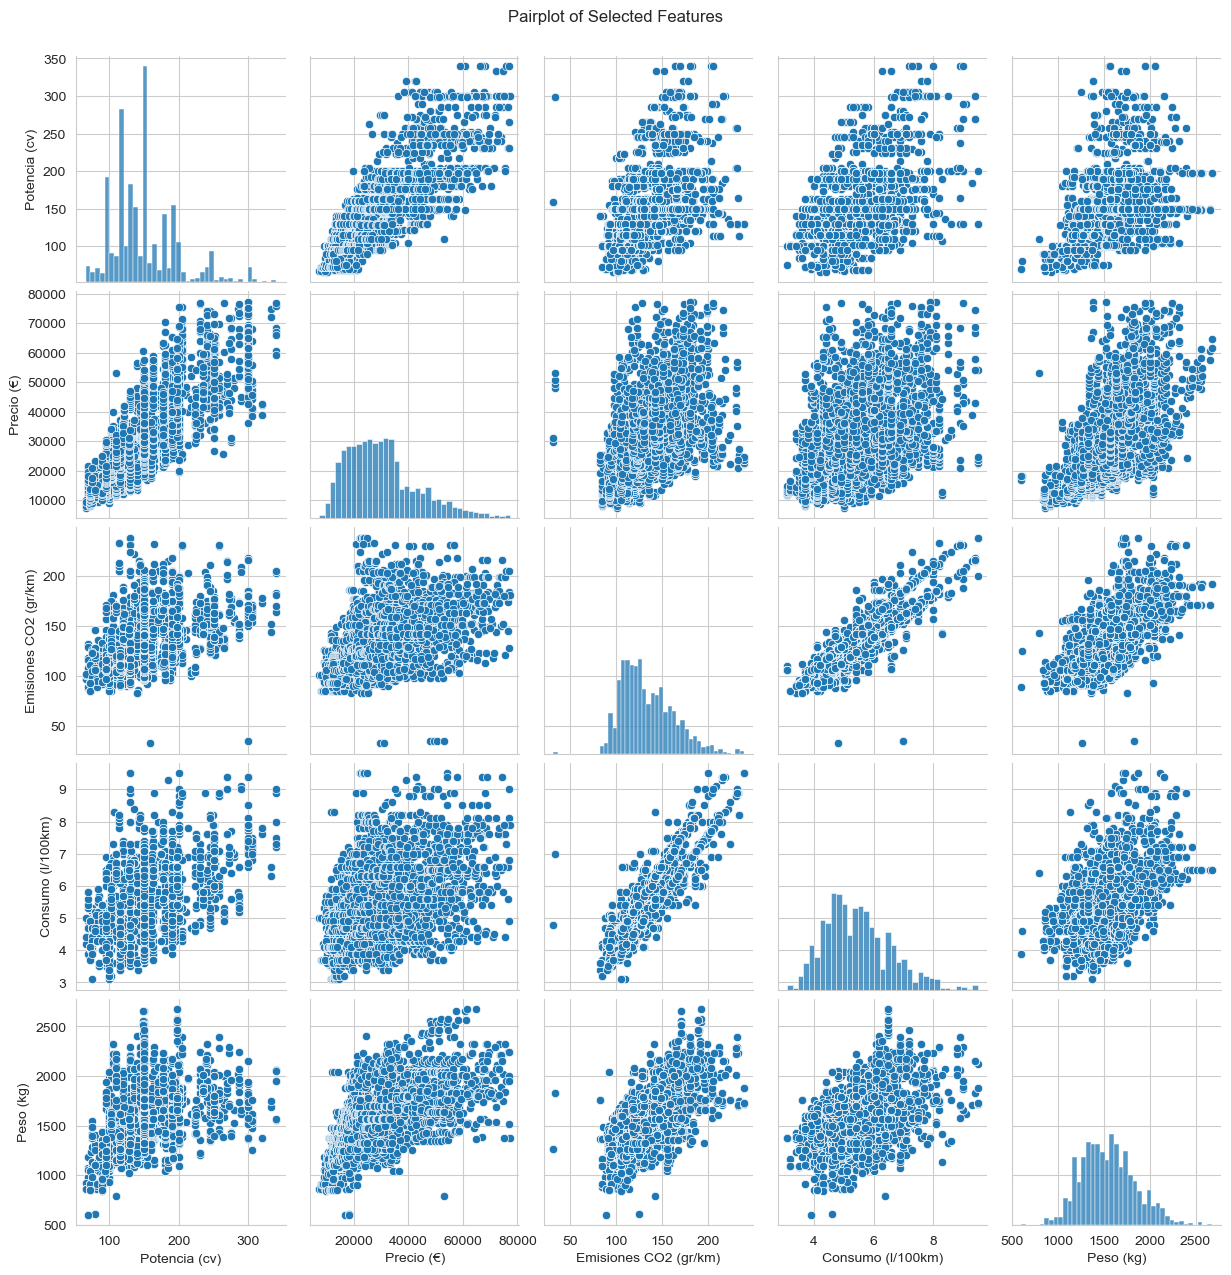

In [506]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot for Power, Price, and CO2 Emissions
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(encoded_data['Potencia (cv)'], encoded_data['Precio (\u20ac)'], encoded_data['Emisiones CO2 (gr/km)'], c='r', marker='o')

ax.set_xlabel('Power (cv)')
ax.set_ylabel('Price (€)')
ax.set_zlabel('CO2 Emissions (gr/km)')
ax.set_title('3D Scatter Plot of Power, Price, and CO2 Emissions')

plt.show()

# Pairplot for a subset of features
features_subset = ['Potencia (cv)', 'Precio (\u20ac)', 'Emisiones CO2 (gr/km)', 'Consumo (l/100km)', 'Peso (kg)']
sns.pairplot(encoded_data[features_subset])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

We observe mainly more or less strong positive correlation. Price and and emmission very slight positive correlation while emission of CO2 and consumptio is very strong. This help us to have an idea of which are the features affecting the most how the CO2 color of the car might vary. 

## Standardizing

We decide to standardize the data for multiple reasons :
- Be consistent with the scale across features
- Prepare our Data for Machine learning algorithms

We will use the StandardScaler function from sklearn.preprocessing for standardization. This method is chosen because it's widely used in preprocessing for machine learning tasks, ensuring that each feature contributes equally to the analysis

In [507]:
# Detect outliers 
df_standardized = encoded_data.copy()
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## Bonus: Classification Logistic Regression VS XGBoost

In [508]:
X = df_standardized.drop(['CO2_gris', 'CO2_rojo', 'CO2_verde'], axis=1)
y = df_standardized['CO2_rojo']  # Using 'CO2_verde' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test as the dataset is not very big 

# Initialize and fit the Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=100000)
logistic_regression.fit(X_train, y_train)

# Predictions
y_pred = logistic_regression.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the Logistic Regression classifier on test set: {:.2f}%'.format(accuracy * 100))

Accuracy of the Logistic Regression classifier on test set: 91.72%


In [509]:
# Define the features and target variable
X = df_standardized.drop(['CO2_gris', 'CO2_rojo', 'CO2_verde'], axis=1)
y = df_standardized['CO2_verde']  # Using 'CO2_verde' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test as the dataset is not very big 

# Initialize and fit the XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)

# Predictions
y_pred = xgb_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the XGBoost classifier on test set: {:.2f}%'.format(accuracy * 100))

/opt/homebrew/Caskroom/miniconda/base/envs/iqcredit/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy of the XGBoost classifier on test set: 100.00%


A 100% success rate might suggest an overfitting, in order to prevent this we could try to get a larger dataset.
It's also possible that with all the interesting features of the dataset XGBoost, being one of the best ML algorithm of classification for tabular data, is able to accurately guess the CO2 color attributed to each car. 

It could also be due to data leakage if for example two very similar model are both in the training dataset and then in the test dataset which would make a lot of sense when looking at the dataset that has multiple similar version. Which probably lead to a overly optimistic model. 

## Other potential model 

Another interesting model to study could be to try to predict the price of the model based on it's feature. To do so we could probably start by fitting a linear regression and then potentially expend to more complex model.

Like studied a model could be to classify the CO2 color of the car with the other fetaures. As used previously trying to fit a logistic regression can be effective and then trying to fit more complex model like SVM (making sure that we chose te correct kernel) or XGBoost 